In [38]:
import sqlite3
sys.path.append('c:/users/cschiff/Documents/GitHub/PAD/')
import Grapher
import Plasma_Plotter

In [2]:
sqlite_file = 'c:/users/cschiff/Documents/GitHub/PAD/instrument_data_db.sqlite'
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

In [3]:
fpi_prd1 = 'x:'

In [4]:
parms = {'time_format'  :mdates.DateFormatter('%H:%M'),
         'time_location':mdates.MinuteLocator(range(0,59),interval = 10,tz=None)}
delta = dt.timedelta(minutes=1)

In [5]:
obs        = 'mms1'
year       = 2017
month      = 5
day        = 22

In [6]:
instrument = 'fpi'
mode       = 'brst'
ver        = '3.1.0'

In [7]:
descriptor = 'des-debug'
eresult = cursor.execute('Select filename from fpi_data where\
                                                    obs        = "%s" and\
                                                    mode       = "%s" and\
                                                    descriptor = "%s" and\
                                                    year       =  %s  and\
                                                    month      =  %s  and\
                                                    day        =  %s;' % 
                                                    (obs,mode,descriptor,year,month,day))
e = eresult.fetchall()

descriptor = 'dis-debug'
iresult = cursor.execute('Select filename from fpi_data where\
                                                    obs        = "%s" and\
                                                    mode       = "%s" and\
                                                    descriptor = "%s" and\
                                                    year       =  %s  and\
                                                    month      =  %s  and\
                                                    day        =  %s;' % 
                                                    (obs,mode,descriptor,year,month,day))
i = iresult.fetchall()

In [8]:
N = 11
print e[N][0]

/data/ftp/mms1/fpi/brst/l2/des-debug/2017/05/22/mms1_fpi_brst_l2_des-debug_20170522082033_v3.1.0.cdf


In [9]:
edebug = pycdf.CDF(fpi_prd1+e[N][0])
idebug = pycdf.CDF(fpi_prd1+i[N][0])

In [10]:
e_t = np.asarray(edebug['Epoch'])
i_t = np.asarray(idebug['Epoch'])

In [67]:
e_E = np.asarray(edebug['mms1_des_energy_brst'][0,:])
i_E = np.asarray(idebug['mms1_dis_energy_brst'][0,:])

In [11]:
e_n = np.asarray(edebug['%s_des_numberdensity_%s' % (obs,mode)])
i_n = np.asarray(idebug['%s_dis_numberdensity_%s' % (obs,mode)])

In [12]:
e_Tperp = np.asarray(edebug['%s_des_tempperp_%s' % (obs,mode)])
i_Tperp = np.asarray(idebug['%s_dis_tempperp_%s' % (obs,mode)])

In [13]:
e_V = np.asarray(edebug['%s_des_bulkv_gse_%s' % (obs,mode)])
i_V = np.asarray(idebug['%s_dis_bulkv_gse_%s' % (obs,mode)])

In [14]:
e_B = np.asarray(edebug['%s_des_b_gse_srvy' % obs])
i_B = np.asarray(idebug['%s_dis_b_gse_srvy' % obs])

In [68]:
e_omni = np.asarray(edebug['%s_des_energyspectr_omni_%s' %(obs,mode)])
i_omni = np.asarray(idebug['%s_dis_energyspectr_omni_%s' %(obs,mode)])

In [69]:
e_scpot = np.asarray(edebug['%s_des_scpot_max_%s' % (obs,mode)])
i_scpot = np.asarray(idebug['%s_dis_scpot_max_%s' % (obs,mode)])

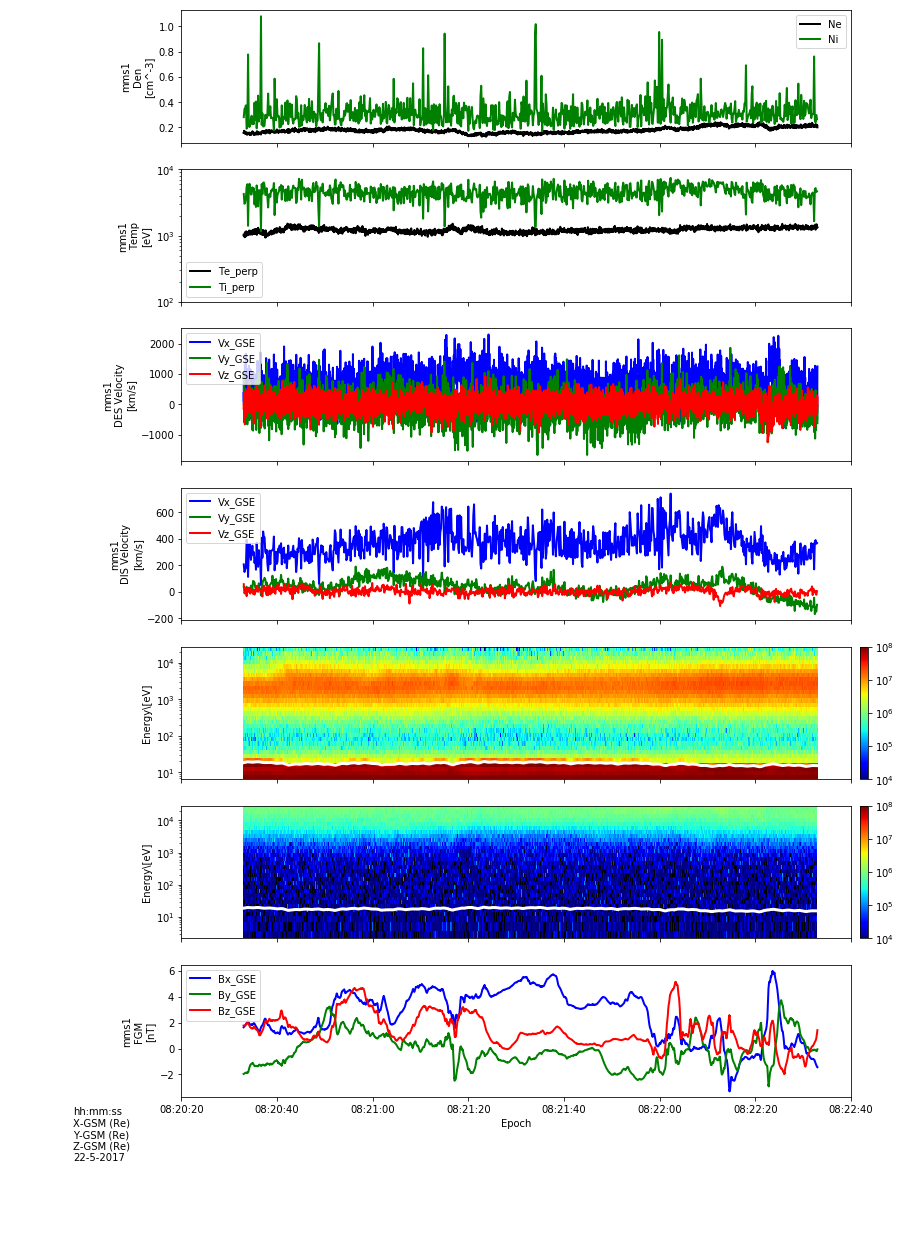

In [98]:
fig,axs = plt.subplots(nrows=7,ncols=1,sharex=True,figsize=(12,20))
Plasma_Plotter.make_density_panel (axs[0],obs,e_t,e_n,i_t,i_n)
Plasma_Plotter.make_Tperp_panel   (axs[1],obs,e_t,e_Tperp,i_t,i_Tperp)
Plasma_Plotter.make_eVvector_panel(axs[2],obs,e_t,e_V,)
Plasma_Plotter.make_iVvector_panel(axs[3],obs,i_t,i_V)
Plasma_Plotter.make_Et_panel      (fig,axs[4],obs,e_t,e_E,e_omni,e_scpot)
Plasma_Plotter.make_Et_panel      (fig,axs[5],obs,i_t,i_E,i_omni,i_scpot)
Plasma_Plotter.make_Bvector_panel (axs[6],obs,e_t,e_B)
Grapher.add_info_box(fig,'%s-%s-%s'%(day,month,year),[-0.05,0.031,0.1,0.1])

In [108]:
edebug.close()
idebug.close()

C:\Users\cschiff\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


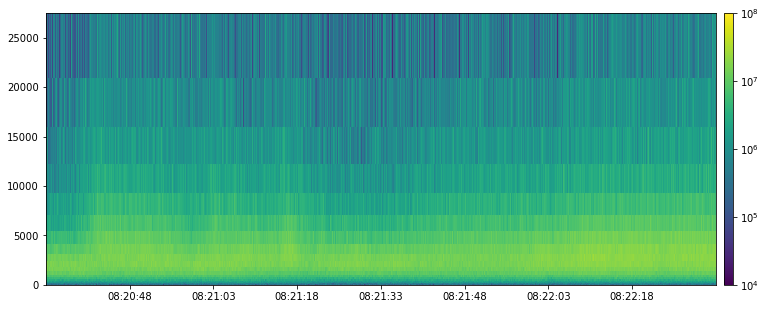

In [86]:
fig1 = plt.figure(figsize=(12,5))
ax1  = fig1.add_subplot(1,1,1)
pc1  = Grapher.patch(ax1,e_t,e_E,np.ma.masked_invalid(np.log10(e_omni.T)),4,8)
pc1.add_colorbar(fig1)
pc1.cbar.set_label("dude, where's my label")

<bound method Figure.draw of <matplotlib.figure.Figure object at 0x000000001BBDC048>>